# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# all imports
import random
import numpy as np
# Load pickled data
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten


In [2]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file = "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

The data set for this project is available as pickled files. There are three sets of pickled files provided- one for each of training, testing and validation. These picked files are loaded and information about the dataset is extracted from them.

>*  The length of the training data set = 34799
>* The length of the testing example = 12630
>* The shape of each image in the data set = 32x32x3 
>* The number of unique classes in the dataset = 43

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Five random integers are chosen and images from the tarining set are displayed using matplot functions.
In addition the count of each sign is calculated using the unique function available in Python and numpy and plotted using matlab functions.

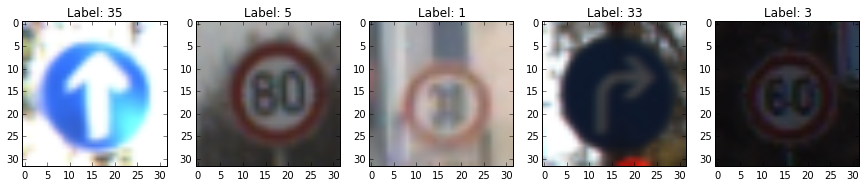

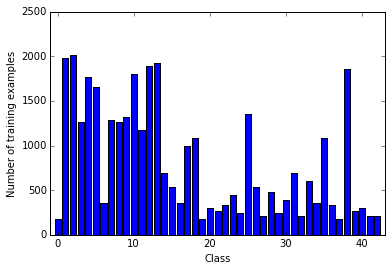

In [4]:

### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
%matplotlib inline

# pick any random five images and display them
plt.figure(figsize=(15,8))
for x in range(0, 5):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()    
    plt.subplot(1,5,x+1)
    plt.imshow(image)    
    plt.title('Label: %d' % y_train[index])  
plt.show()

# display the unique labels that we have in bargraph
labels, counts = np.unique(y_train, return_counts=True)
plt.bar( np.arange( 43 ), counts, align='center' )
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.xlim([-1, 43])
plt.show()



        

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
def grayscale(image):
    # use lumnosity to convert to grayscale as done by GIMP software
    # refer https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/
    image = image[:,:,0] * .21 + image[:,:,1] * .72 + image[:,:,2]* .07
    return image

# iterate through the image set and convert them to grayscale images
def preprocess(data):
    gray_images = []
    for image in data:
        gray = grayscale(image)        
        gray = np.reshape(gray,(32 , 32, 1))        
        gray_images.append(gray)
        
    return np.array(gray_images)

def normalize(data):
    return data / 255 * 0.8 + 0.1

(34799, 32, 32, 1)


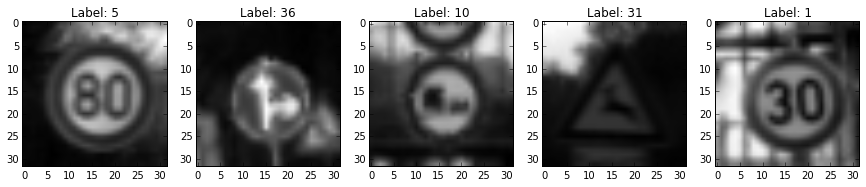

In [6]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Preprocessing done for training data

# shuffle the training data
X_train, y_train = shuffle(X_train, y_train)

# Convert colored pixel values to grayscale
X_train = preprocess(X_train)

print(X_train.shape)

# test any random image to see if its now grayscale by printing its dimension and the image itself
plt.figure(figsize=(15,8))
for i in range(0,5):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.subplot(1,5,i+1)
    plt.imshow(image, cmap='gray')
    plt.title('Label: %d' % y_train[index])
    
plt.show()

X_train = normalize(X_train)



(4410, 32, 32, 1)


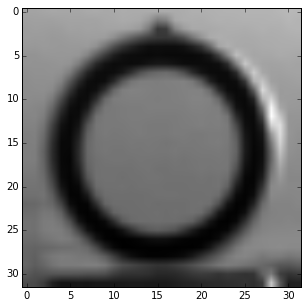

In [7]:
# Preprocessing done for validation data

# shuffle the training data
X_valid, y_valid = shuffle(X_valid, y_valid)

# Convert colored pixel values to grayscale
X_valid = preprocess(X_valid)

print(X_valid.shape)

# test any random image to see if its now grayscale by printing its dimension and the image itself
index = random.randint(0, len(X_valid))
image = X_valid[index].squeeze()
# Assert that the length of the image shape is now 2
assert(len(image.shape) == 2)
plt.figure(figsize=(5,5))
plt.imshow(image, cmap='gray')

X_valid = normalize(X_valid)


(12630, 32, 32, 1)


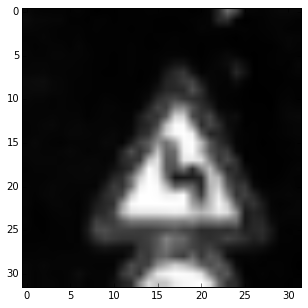

In [8]:
#Preprocessing done done for test data
# shuffle the training data
X_test, y_test = shuffle(X_test, y_test)

# Convert colored pixel values to grayscale
X_test = preprocess(X_test)

print(X_test.shape)

# test any random image to see if its now grayscale by printing its dimension and the image itself
index = random.randint(0, len(X_test))
image = X_test[index].squeeze()
# Assert that the length of the image shape is now 2
assert(len(image.shape) == 2)
plt.figure(figsize=(5,5))
plt.imshow(image, cmap='gray')

X_test = normalize(X_test)

In [9]:
EPOCHS = 40
BATCH_SIZE = 160

### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
  

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
     
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43 since the final number of classes is 43
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 1),name='input_placeholder')
y = tf.placeholder(tf.int32, (None),name='output_placeholder')
one_hot_y = tf.one_hot(y, 43)

In [12]:
rate = 0.005

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy =  sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    

Training...

EPOCH 1 ...
Validation Accuracy = 0.802

EPOCH 2 ...
Validation Accuracy = 0.861

EPOCH 3 ...
Validation Accuracy = 0.881

EPOCH 4 ...
Validation Accuracy = 0.910

EPOCH 5 ...
Validation Accuracy = 0.909

EPOCH 6 ...
Validation Accuracy = 0.899

EPOCH 7 ...
Validation Accuracy = 0.910

EPOCH 8 ...
Validation Accuracy = 0.908

EPOCH 9 ...
Validation Accuracy = 0.905

EPOCH 10 ...
Validation Accuracy = 0.923

EPOCH 11 ...
Validation Accuracy = 0.913

EPOCH 12 ...
Validation Accuracy = 0.924

EPOCH 13 ...
Validation Accuracy = 0.902

EPOCH 14 ...
Validation Accuracy = 0.929

EPOCH 15 ...
Validation Accuracy = 0.915

EPOCH 16 ...
Validation Accuracy = 0.925

EPOCH 17 ...
Validation Accuracy = 0.923

EPOCH 18 ...
Validation Accuracy = 0.922

EPOCH 19 ...
Validation Accuracy = 0.922

EPOCH 20 ...
Validation Accuracy = 0.932

EPOCH 21 ...
Validation Accuracy = 0.915

EPOCH 22 ...
Validation Accuracy = 0.917

EPOCH 23 ...
Validation Accuracy = 0.910

EPOCH 24 ...
Validation Accura

In [19]:
with tf.Session() as sess:    
    saver.restore(sess,  './lenet')
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.915


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


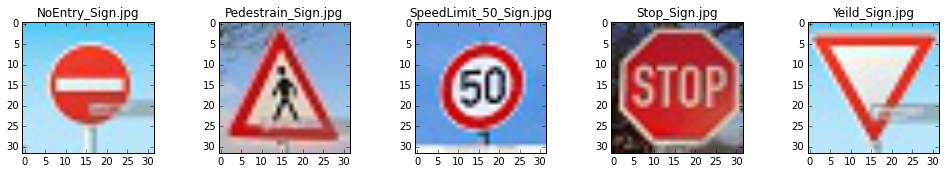

In [20]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg
from PIL import Image, ImageFilter

german_traffic = os.listdir("german_traffic_sign/")
traffic_images = []
expected_traffic_image_labels = np.array([17, 27, 2, 14, 13])

for pic in german_traffic:
    image = mpimg.imread("german_traffic_sign/"+pic)
    # test to ensure that each image is 32x32x3   
    print(image.shape)
    traffic_images.append(image)
    
#display the new images with the names    
plt.figure(figsize = (17,8))    
for i, image in enumerate(traffic_images):
    plt.subplot(3, 5, i+1)    
    plt.imshow(image)
    plt.title(german_traffic[i])
    


### Predict the Sign Type for Each Image

(5, 32, 32, 1)


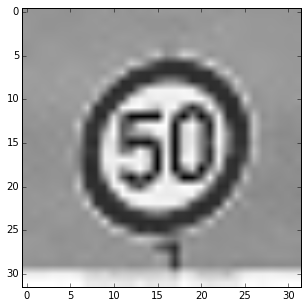

In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

#Preprocess the image data

# Convert colored pixel values to grayscale
traffic_images = preprocess(traffic_images)

print(traffic_images.shape)

# test any random image to see if its now grayscale
index = random.randint(0, len(traffic_images)-1)
image = traffic_images[index].squeeze()
plt.figure(figsize=(5,5))
plt.imshow(image, cmap='gray')

traffic_images = normalize(traffic_images)


### Analyze Performance

In [22]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

import tensorflow as tf
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 1),name='input_placeholder') 
logits=LeNet(x)
prediction = tf.argmax(logits, 1)
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess,  './lenet')
    
    predicted_labels = sess.run(prediction, feed_dict={x: traffic_images})   
    


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [23]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax = tf.nn.softmax(logits)
 
with tf.Session() as sess:    
    saver.restore(sess,  './lenet')    
    result = sess.run(softmax, feed_dict={x: traffic_images})       


In [24]:
#Get the top 5 probabilities and predicted values
values, indices = tf.nn.top_k(result, 5)
with tf.Session() as sess:    
    saver.restore(sess,  './lenet')
    probs = sess.run(values)
    predictions = sess.run(indices)   

#store the highest predicted label for each image to be used for comparison later   
predicted_traffic_label = []
    
for i in range(len(predictions)):    
    print('Image', i, 'probabilities: ', probs[i], '\n and predicted classes:', predictions[i])
    predicted_traffic_label.append(predictions[i][0])


Image 0 probabilities:  [  1.00000000e+00   5.99299872e-38   7.66510260e-43   1.40129846e-45
   0.00000000e+00] 
 and predicted classes: [17 30 40 12  0]
Image 1 probabilities:  [  8.98172915e-01   1.01827145e-01   2.94928404e-19   4.12201595e-30
   3.96385374e-34] 
 and predicted classes: [27 18 11 21 29]
Image 2 probabilities:  [  1.00000000e+00   9.24918605e-25   5.35597999e-25   3.91828858e-28
   3.15814631e-32] 
 and predicted classes: [ 2  5  3 39  7]
Image 3 probabilities:  [  9.99105990e-01   8.93934281e-04   4.49756232e-09   1.40577980e-10
   3.90982141e-14] 
 and predicted classes: [14 38 17  2 13]
Image 4 probabilities:  [ 1.  0.  0.  0.  0.] 
 and predicted classes: [13  0  1  2  3]


In [25]:
# Load signnames.csv to map label number to sign string
signames_map = {}
with open('signnames.csv', 'r') as f:
    first_line = True
    for line in f:
        # Ignore first line
        if first_line:
            first_line = False
            continue

        # Populate label_map
        label_num, label_name = line.split(',')
        label_num = int(label_num)

        signames_map[label_num] = label_name

# check each image against the expected value to see how accuracte is the prediction
for i, value in enumerate(predicted_traffic_label):
    if value == expected_traffic_image_labels[i]:
        print('%s --> %s --> %s' % (value, signames_map[value], "Prediction correct"))
    else :
        print('%s --> %s --> %s' % (value, signames_map[value], "Prediction Incorrect"))

17 --> No entry
 --> Prediction correct
27 --> Pedestrians
 --> Prediction correct
2 --> Speed limit (50km/h)
 --> Prediction correct
14 --> Stop
 --> Prediction correct
13 --> Yield
 --> Prediction correct


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 